### Load data and view meta data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = 'C:\\Users\\Belgau\\Desktop\\FP_dataset.csv'
df = pd.read_csv (filepath)
df = df.iloc[: , 1:] #drop first col (numbered index from web scrap)
df.head()

,locations,service_center,business_status,address,rating,price_level,review_count
0,AL Birmingham,1.0,OPERATIONAL,"2403 21st St N, Birmingham, AL 35234, United S...",4.7,2.0,60
1,AL Decatur,NaN,OPERATIONAL,"1101 McEntire Ln NW, Decatur, AL 35601, United...",4.8,2.0,24
2,AL Dothan,NaN,OPERATIONAL,"2308 N Range St, Dothan, AL 36303, United States",4.8,2.0,28
3,AL Mobile,1.0,OPERATIONAL,"5245 Halls Mill Rd, Mobile, AL 36619, United S...",4.5,2.0,48
4,AL Tuscaloosa,NaN,OPERATIONAL,"5947 Old Montgomery Hwy, Tuscaloosa, AL 35405,...",4.7,2.0,26


In [3]:
df.shape

(111, 7)

In [4]:
for i,col in enumerate(df.columns): #Show number of columns and names
    print(i,col)

0 locations
1 service_center
2 business_status
3 address
4 rating
5 price_level
6 review_count


In [5]:
df.dtypes

locations           object
service_center     float64
business_status     object
address             object
rating             float64
price_level        float64
review_count         int64
dtype: object

In [6]:
df.describe(include='all')

,locations,service_center,business_status,address,rating,price_level,review_count
count,111,55.0,111,111,111.000000,97.0,111.000000
unique,111,NaN,2,109,NaN,NaN,NaN
top,MN St. Cloud,NaN,OPERATIONAL,"17000 S Main St, Gardena, CA 90248, United States",NaN,NaN,NaN
freq,1,NaN,110,2,NaN,NaN,NaN
mean,NaN,1.0,NaN,NaN,4.441441,2.0,39.441441
std,NaN,0.0,NaN,NaN,0.305545,0.0,26.934832
min,NaN,1.0,NaN,NaN,3.600000,2.0,2.000000
25%,NaN,1.0,NaN,NaN,4.200000,2.0,22.500000
50%,NaN,1.0,NaN,NaN,4.400000,2.0,34.000000
75%,NaN,1.0,NaN,NaN,4.700000,2.0,51.500000


In [7]:
#there were some duplicate addresses
pd.concat(g for _, g in df.groupby("address") if len(g) > 1)

#looks like the scrapper or data cleaning process messed up 2 of these 4 entries.
#Note: Longview has zero google reviews...which may have made it challenging for the API to pick up?

,locations,service_center,business_status,address,rating,price_level,review_count
13,CA Ontario,NaN,OPERATIONAL,"17000 S Main St, Gardena, CA 90248, United States",4.2,2.0,37
46,ME Scarborough,1.0,OPERATIONAL,"17000 S Main St, Gardena, CA 90248, United States",4.2,2.0,37
97,TX Kilgore,NaN,OPERATIONAL,"502 TX-135, Kilgore, TX 75662, United States",4.4,2.0,63
98,TX Longview,1.0,OPERATIONAL,"502 TX-135, Kilgore, TX 75662, United States",4.4,2.0,63


### Corrected the two BAD data points and uploaded new data

In [8]:
filepath = 'C:\\Users\\Belgau\\Desktop\\FP_dataset_v2.csv'
df = pd.read_csv(filepath)
df = df.iloc[: , 1:] #drop first col (numbered index from web scrap)
df.describe(include='all')

,locations,service_center,business_status,address,rating,price_level,review_count
count,111,55.0,111,111,110.000000,96.0,111.000000
unique,111,NaN,2,111,NaN,NaN,NaN
top,MN St. Cloud,NaN,OPERATIONAL,"721 VT-78, Swanton, VT 05488, United States",NaN,NaN,NaN
freq,1,NaN,110,1,NaN,NaN,NaN
mean,NaN,1.0,NaN,NaN,4.443636,2.0,38.711712
std,NaN,0.0,NaN,NaN,0.306063,0.0,27.162269
min,NaN,1.0,NaN,NaN,3.600000,2.0,0.000000
25%,NaN,1.0,NaN,NaN,4.200000,2.0,22.000000
50%,NaN,1.0,NaN,NaN,4.450000,2.0,33.000000
75%,NaN,1.0,NaN,NaN,4.700000,2.0,51.000000


In [9]:
#separate state from location
df['state'] = df['locations'].str[:2]
df['locations'] = df['locations'].str[3:]
df.head()

,locations,service_center,business_status,address,rating,price_level,review_count,state
0,Birmingham,1.0,OPERATIONAL,"2403 21st St N, Birmingham, AL 35234, United S...",4.7,2.0,60,AL
1,Decatur,NaN,OPERATIONAL,"1101 McEntire Ln NW, Decatur, AL 35601, United...",4.8,2.0,24,AL
2,Dothan,NaN,OPERATIONAL,"2308 N Range St, Dothan, AL 36303, United States",4.8,2.0,28,AL
3,Mobile,1.0,OPERATIONAL,"5245 Halls Mill Rd, Mobile, AL 36619, United S...",4.5,2.0,48,AL
4,Tuscaloosa,NaN,OPERATIONAL,"5947 Old Montgomery Hwy, Tuscaloosa, AL 35405,...",4.7,2.0,26,AL


### Dealing with missing and null values

In [131]:
#remove BLANKS and NULLS for plotting 'rating' vs 'review_count'
df_noblanks = df.replace("", "NaN")
df_noblanks.dropna(subset = ['rating', 'review_count'], inplace=True) #Drop NULLS
df.shape, df_noblanks.shape #one row was removed

#df[df.locations.str.contains('longview',case=False)] #this row was longview, as no longer in df

((110, 8), (109, 8))

### Is price_level (number of dollar signs) worth keeping in the dataset?

In [10]:
#all locations that hv price_level entries are 2$$, but some are empty
locs_noprice = df[df['price_level'].isnull()]
locs_noprice[['locations','review_count']], len(locs_noprice)
#15 null entries

#incomplete analysis
#need to see relationship between number of dollar signs and reviews

(          locations  review_count
 5            Conway            54
 6       Little Rock            14
 8         Texarkana            74
 24        Ellenwood            59
 25         Valdosta            59
 31         Rockford             5
 32      Clarksville            46
 73  Pleasant Valley             2
 78     Steubenville            94
 80      Weatherford            96
 81         Carlisle             9
 82       Harrisburg             3
 84             York             8
 98         Longview             0
 99         Seminole             8, 15)

In [78]:
#Group by null entries and compare

### Remove locations no longer in operation

In [132]:
df[df.business_status.str.contains('OPERATIONAL')== False]

,locations,service_center,business_status,address,rating,price_level,review_count,state


In [133]:
df = df[df.business_status.str.contains('OPERATIONAL')== True]
df.shape
#Drop Milford from dataset

(110, 8)

### Examine Distributions & Correlations

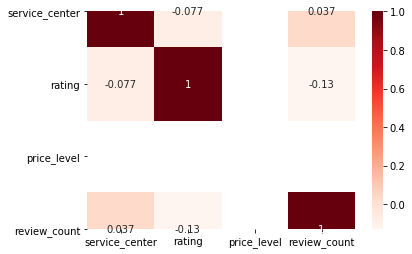

In [135]:
corrMatrix = df.corr() #find corr of all var relationships (only works with float and int64 dtypes)
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Reds) #-1 is weak, 1 is strong
plt.show()

#weak corr between rating & review_count

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


[Text(0.5, 1, 'Box Plot: Rating')]

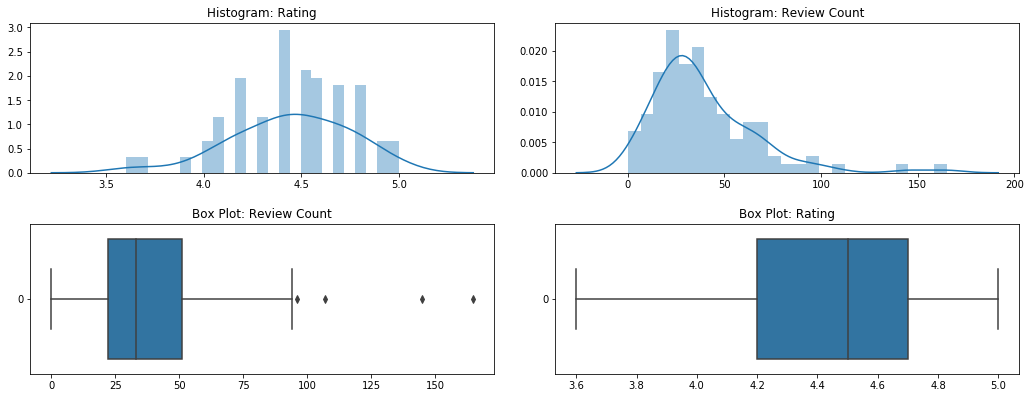

In [209]:
# How do the distributions look?
fig, axes = plt.subplots(2, 2, figsize=(15,6))
plt.tight_layout(pad=3.0)

sns.distplot(df['rating'], bins=25, ax=axes[0,0]).set(title='Histogram: Rating',xlabel='')
sns.distplot( df['review_count'],  bins=25, ax=axes[0,1]).set(title='Histogram: Review Count',xlabel='')

sns.boxplot(ax=axes[1,0], data=df['review_count'], orient="h").set(title='Box Plot: Review Count')
sns.boxplot(ax=axes[1,1], data=df['rating'], orient="h").set(title='Box Plot: Rating')

#min, max, median, IQR
#some outliers potentially

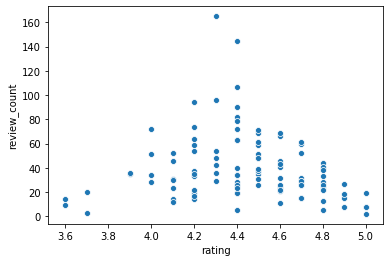

In [140]:
sns.scatterplot(x='rating', y='review_count', data=df)
#there might be an interesting relationship here
#use spline to smooth this out, but need unique x-axis values in array format
#create an average value for each unique 'rating'

In [141]:
# What stores are top two for review_count?
# they appear to be performing well
df.sort_values(['review_count'], ascending=False, inplace=False).head(2)

,locations,service_center,business_status,address,rating,price_level,review_count,state
22,Tampa,1.0,OPERATIONAL,"3517 N 40th St, Tampa, FL 33605, United States",4.3,2.0,165,FL
9,Phoenix,0.0,OPERATIONAL,"1801 N Black Canyon Hwy, Phoenix, AZ 85009, Un...",4.4,2.0,145,AZ


In [142]:
# How do these locations compare to the set?
df['review_count'].mean(), df['rating'].mean()

#rating a bit lower, but within reasonable margin (not likely to be underperforming)

(38.93636363636364, 4.445871559633027)

In [128]:
#there might be an interesting relationship here
#spline needs unique x values as an array
#aggregate avg function by rating

df2 = df.groupby(['rating']).mean()
df2.reset_index(level=0, inplace=True) #turn rating index into a new col
df2[['rating','review_count']]


,rating,review_count
0,3.6,11.500000
1,3.7,11.500000
2,3.9,35.500000
3,4.0,46.250000
4,4.1,29.714286
5,4.2,43.500000
6,4.3,67.142857
7,4.4,53.000000
8,4.5,47.076923
9,4.6,35.333333


Text(0, 0.5, 'review_count')

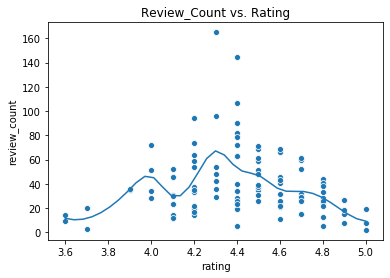

In [143]:
sns.scatterplot(x='rating', y='review_count', data=df)

from scipy.interpolate._bsplines import make_interp_spline

x = df2['rating'].to_numpy()
y = df2['review_count'].astype(float).to_numpy()

X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers over a specified interval.
X_ = np.linspace(x.min(), x.max(), 35)
Y_ = X_Y_Spline(X_)

sns.lineplot(x=X_, y=Y_)

plt.title("Review_Count vs. Rating")
plt.xlabel("rating")
plt.ylabel("review_count")

In [152]:
# if we could dig into the individual reviews data (not allowed by API)...
# we probably have a handful of bad reviews lowering this group from 4.3 to =~4
# what locations are part of that first hump?

df.loc[(df['rating'] == 4) & (df['review_count'] > 40)]

#these locations need some attention... need more data to see why they have higher review count, yet low rating.


,locations,service_center,business_status,address,rating,price_level,review_count,state
29,Mokena,1.0,OPERATIONAL,"19622 97th Ave, Mokena, IL 60448, United States",4.0,2.0,51,IL
93,Corpus Christi,1.0,OPERATIONAL,"7749, # Ih-37, Corpus Christi, TX 78409, Unite...",4.0,2.0,72,TX


In [ ]:
# Next step...
# can we fit an equation to this spline curve?
# this will help show which stores are performing above/below average.
    # can develop significance test, to show meaningful deviations away from this relationship

### Group By State

In [211]:
#aggregate functions by state
df_state_loccount = df.groupby(['state']).size() #finds how many locations in ea state
df_state = df.groupby(['state']).sum()

df_state = pd.concat([df_state,df_state_loccount], 1)

#formatting
df_state.drop(['price_level'], 1, inplace=True) 
df_state.rename(columns={df_state.columns[3]: "num_of_locs"}, inplace = True)
df_state.rename(columns={'service_center': "num_of_servicecenters"}, inplace = True)
df_state.reset_index(level=0, inplace=True) #turn state index into a new col

#additional metrics
df_state['reviews_per_loc'] = df_state['review_count'] / df_state['num_of_locs']
df_state['avg_rating_loc_weighted'] = df_state['rating'] / df_state['num_of_locs'] #does not account for total reviews
df_state.drop(['rating'], 1, inplace=True)
df_state['percent_servicecenter'] = df_state['num_of_servicecenters'] / df_state['num_of_locs'] *100

df_state.head()

,state,num_of_servicecenters,review_count,num_of_locs,reviews_per_loc,avg_rating_loc_weighted,percent_servicecenter
0,AL,2.0,186,5,37.2,4.700,40.0
1,AR,3.0,174,4,43.5,4.300,75.0
2,AZ,0.0,180,2,90.0,4.450,0.0
3,CA,0.0,104,4,26.0,4.275,0.0
4,CT,0.0,75,3,25.0,4.200,0.0


[Text(0.5, 1.0, 'Reviews Per Location by State')]

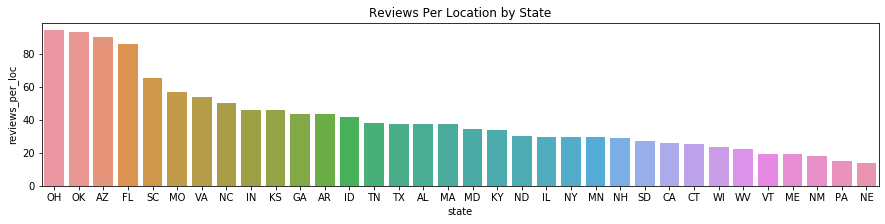

In [70]:
#sorting
df_state.sort_values(['reviews_per_loc'], ascending=False, inplace=True)
plt.gcf().set_size_inches(15, 3)
sns.barplot(x='state', y='reviews_per_loc', data=df_state).set(title='Reviews Per Location by State')

#these states might have the highest sales, assuming there's a relationship to reviews

[Text(0.5, 1.0, 'Number of Locations by State')]

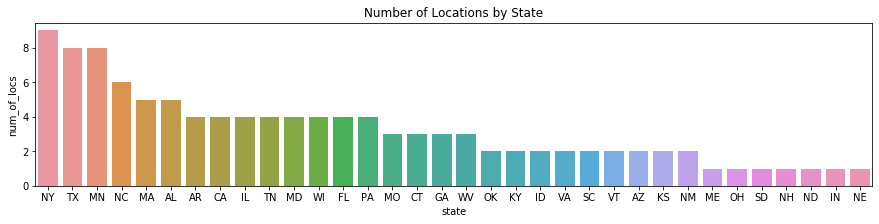

In [71]:
#sorting
df_state.sort_values(['num_of_locs'], ascending=False, inplace=True)
plt.gcf().set_size_inches(15, 3)
sns.barplot(x='state', y='num_of_locs', data=df_state).set(title='Number of Locations by State')

In [223]:
#why does NY have so many locations but low review/loc ratio (low num of reviews)?
df_NY = df[df['state'].str.contains('NY')]
df_NY.loc[(df_NY['locations'] == 'Pleasant Valley')]

#maybe it's being brought down by the Pleasant Valley location?

,locations,service_center,business_status,address,rating,price_level,review_count,state
73,Pleasant Valley,1.0,OPERATIONAL,"1931 US-44, Pleasant Valley, NY 12569, United ...",5.0,NaN,2,NY


In [224]:
#How does each location's review_count compare to the average?
review_count_mean = df['review_count'].mean()
review_count_NY = df_NY['review_count'].mean()
print('tot_review_avg: ' + str(review_count_mean) +'\nNY_review_avg: ' + str(review_count_NY))

tot_review_avg: 38.93636363636364
NY_review_avg: 29.666666666666668


In [225]:
df_NY = df_NY[df_NY["locations"].str.contains("Pleasant Valley")==False]
#How does each location's review_count compare to the average?
review_count_mean = df['review_count'].mean()
review_count_NY = df_NY['review_count'].mean()
print('tot_review_avg: ' + str(review_count_mean) +'\nNY_review_avg: ' + str(review_count_NY))

#NY review/loc metric goes up when remove Pleasant Valley but still significantly below mean
#maybe the number of service centers is correlated to review count?

tot_review_avg: 38.93636363636364
NY_review_avg: 33.125


[Text(0.5, 1.0, 'Service Centers by State')]

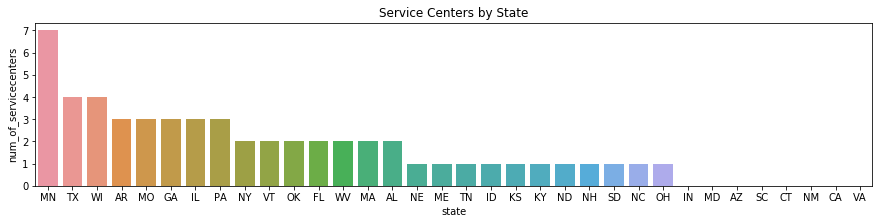

In [34]:
#Service Centers by State
df_state.sort_values(['num_of_servicecenters'], ascending=False, inplace=True)

plt.gcf().set_size_inches(15, 3)
sns.barplot(x='state', y='num_of_servicecenters', data=df_state).set(title='Service Centers by State')

[Text(0.5, 1.0, 'Service Center Percentage by State')]

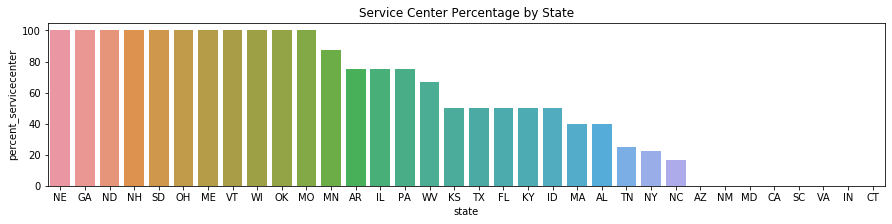

In [75]:
#Percent of Service Centers by State
df_state.sort_values(['percent_servicecenter'], ascending=False, inplace=True)
plt.gcf().set_size_inches(15, 3)
sns.barplot(x='state', y='percent_servicecenter', data=df_state).set(title='Service Center Percentage by State')

### Does being a service center have a higher propability of having more reviews or higher rating?


In [226]:
df['service_center'] = df['service_center'].fillna(0) #turn all nulls to zero

df_ss_count = df.groupby(['service_center']).size() #count how many locations are service centers
df_ss1 = df.groupby(['service_center']).mean()

df_ss1 = pd.concat([
    df_ss1,
    df_ss_count], 1)

df_ss1.rename(columns={df_ss1.columns[3]: "num_of_locs"}, inplace = True)
df_ss1.rename(columns={df_ss1.columns[2]: "avg_num_of_reviews"}, inplace = True)
df_ss1.reset_index(level=0, inplace=True) #turn service_center index into a new col (boolean)
df_ss1.drop(['price_level'], 1, inplace=True)

df_ss1

,service_center,rating,avg_num_of_reviews,num_of_locs
0,0.0,4.469091,37.927273,55
1,1.0,4.422222,39.945455,55


[(50, 60)]

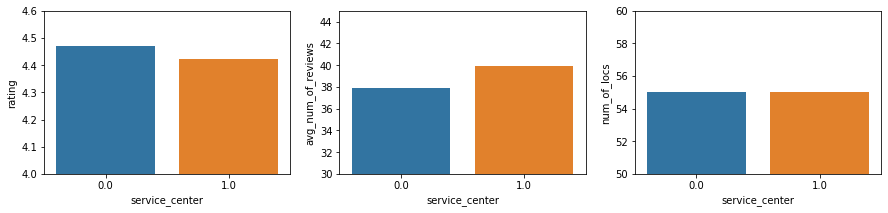

In [186]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
sns.barplot(ax=axes[0], x='service_center', y='rating', data=df_ss1).set(ylim=(4,4.6))
sns.barplot(ax=axes[1], x='service_center', y='avg_num_of_reviews', data=df_ss1).set(ylim=(30,45))
sns.barplot(ax=axes[2], x='service_center', y='num_of_locs', data=df_ss1).set(ylim=(50,60))

#these figures aren't very pretty, but communicates that there isn't a big difference between service_center qualifier
#the ylim scaling impacts interpretation, so we would probably want to just show these as numerics rather than figures.

#can do ANOVA test (scipy.stats.f_oneway) to analyze f & p values to confirm no difference of rating & review_count
#if p>0.05 then there is not a sig diff

In [207]:
df_noss = df.loc[(df['service_center'] == 0)]
df_ss = df.loc[(df['service_center'] == 1)]

In [208]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_noss['rating'], df_ss['rating'])

#if p>0.05 then there is not a sig diff